# Customer Attrition Model - Part 3
## Customer Segmentation

# 3.0 Notebook Brief

Customer segmentation is main marketing tool where the process includes classification of customer via demographics. These calls for active research and identification through surveys ain which at time the customer information gathered are biased.[(Shopify, n.d.)](https://www.shopify.com.sg/encyclopedia/customer-segmentation)

In contrary, customer information can be gather through passive actions, such as product usage/subscription, frequency of purchase, length of stay with the company defines customer behaviour towards the business. As such, these information are available already as e-commerce business have sales records of their users.

Upon exploratory data analysis in Notebook 2, we will employ a clustering method using K-Means as part of customer segmentation.This notebook will use clustering and further analysis to validate the customer types where it can be useful for targetting and the next churn prediction models.

## 3.1 Data Imports

In [ ]:
#import library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import cluster lib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
#import with dummies 
telco_final = pd.read_csv('../data/telco_cleaned_final.csv')

pd.set_option('display.max_columns',99)

In [3]:
telco_final.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density,new_user
0,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,1,0,0,DSL,0,0,1,0,0,1,Month-to-month,1,Electronic check,1,100,5433,Competitor offered more data,0,0,None,0.00,DSL,8,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1,Competitor,15334,0
1,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,8,1,1,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),1,69,5302,Competitor made better offer,1,1,Offer E,48.85,Fiber Optic,17,0,1,80.65,633.30,0.00,0,390.80,1024.10,3,1,Competitor,17038,0
2,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,18,1,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,1,81,3179,Competitor made better offer,0,0,Offer D,11.33,Fiber Optic,52,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Competitor,8625,0
3,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,25,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,1,88,5337,Limited range of services,1,1,Offer C,19.76,Fiber Optic,12,0,1,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Dissatisfaction,11799,0
4,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,37,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,67,2793,Extra data charges,1,1,Offer C,6.33,Fiber Optic,14,0,1,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Price,6947,0


### 3.1.2 Columns for Clustering and Verification

In this clustering method using K Means, we will take into account the earlier collinear features identified in Notebook 2.0 to exclude in the clustering model below. 

As K Means is an unsupervised model, in order to verify the cluster separation, a verification columns consist of the churn behaviour and satisfaction of the services will be used as a comparison.

In [4]:
#clustering features, and excluded collinear columns
clus_col = ['age', 'under_30', 'senior_citizen', 'married',
            'number_of_dependents', 'tenure_months', 'phone_service','multiple_lines','internet_service', 
            'online_security','online_backup', 'device_protection', 'tech_support', 'streaming_tv',
            'streaming_movies', 'contract', 'paperless_billing', 'payment_method','cltv', 
            'number_of_referrals', 'offer','streaming_music', 'unlimited_data','total_refunds', 
            'total_charges','total_extra_data_charges', 'total_long_distance_charges','total_revenue']

In [5]:
#verification cols that will not be used for clustering
ver_col = ['churn_value','churn_score','customer_status', 'new_user','satisfaction_score']

In [6]:
telco_clus = telco_final[clus_col]

## 3.2 Preprocessing Features

Prior to modeling, thec cluster features are one hot encoded and standard scaled to minimize bias on strong features. 

### 3.2.1 One Hot Encoding

In [7]:
#OHE clustering columns
telco_clus = pd.get_dummies(data=telco_clus, drop_first=True)

### 3.2.2 Standardisation of Values

In [8]:
#standardisation
X_sc = StandardScaler().fit_transform(telco_clus)

### 3.2.3. Inertia and Silhouette Score

**Silhouette Score** is one method used to evaluate our results. High silhouette scores indicates that cohesion within the cluster is low and high separation with neighbouring cluster. 
**Inertia** on the other hand is the sum of squared errors of each clusters. The goal is to achieve small value of inertia, with small number of clusters.

Ideally, the goal is to attain a high silhoutte score with low inertia.

In [9]:
#inspect k, number of clusters 

scores = []
for k in range(2, 10):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df

,k,inertia,silhouette
0,2,218458.662673,0.148466
1,3,200156.121151,0.117287
2,4,192397.888937,0.116712
3,5,185668.833841,0.110071
4,6,179900.049440,0.101977
5,7,175050.565201,0.103331
6,8,171264.344374,0.086758
7,9,165930.467423,0.094862


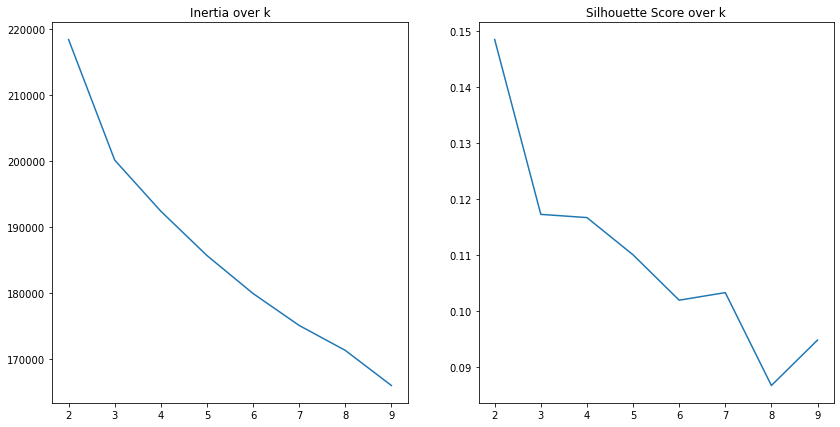

In [13]:
#plot inertia and silhouette score
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')
plt.show()

*Interpretation: With the inertia elbow at 3, the silhouette score over k shows a slightly higher score for k = 4. With a minor trade off, the clusters of 4 are more feasible for this customer segmentation set up. The current data set of 7043 customers are only a small portion of the population. The customer segmentation would need to generalise slightly more for the unsampled population. This clustering method would then benefitial as the customer database increase.*

## 3.3 K Means Clustering

K Means clustering is a method of vector quantization. This method partitions the users into numbers of clusters (k) where each observations belong to its nearest mean (cluster centers/ cluster centroid). K Means minimized intra-cluster variances while maximizes the inter-cluster separation. 

As the above inertia and silhouette metric test, 4 clusters will be used for this clustering. 

In [11]:
#instantiate with 4 cluster using clustering features 
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_sc)

#labels to cluster as columns
telco_final['cluster'] = km.labels_
telco_final.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density,new_user,cluster
0,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,1,0,0,DSL,0,0,1,0,0,1,Month-to-month,1,Electronic check,1,100,5433,Competitor offered more data,0,0,None,0.00,DSL,8,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1,Competitor,15334,0,3
1,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,8,1,1,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),1,69,5302,Competitor made better offer,1,1,Offer E,48.85,Fiber Optic,17,0,1,80.65,633.30,0.00,0,390.80,1024.10,3,1,Competitor,17038,0,3
2,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,18,1,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,1,81,3179,Competitor made better offer,0,0,Offer D,11.33,Fiber Optic,52,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Competitor,8625,0,3
3,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,25,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,1,88,5337,Limited range of services,1,1,Offer C,19.76,Fiber Optic,12,0,1,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Dissatisfaction,11799,0,3
4,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,37,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,67,2793,Extra data charges,1,1,Offer C,6.33,Fiber Optic,14,0,1,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Price,6947,0,3


In [12]:
#remove location from df to review the cluster behavior
telco_final = telco_final.drop(columns=['zip_code','latitude','longitude'])
clusters = telco_final.groupby('cluster').mean()
clusters

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,avg_monthly_long_distance_charges,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,pop_density,new_user
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.500000,46.694853,0.201681,0.184349,0.723739,0.259979,0.530462,59.998950,0.963761,0.730567,0.575105,0.704307,0.712185,0.591912,0.732143,0.752101,0.689076,0.127626,54.587710,5042.455882,0.689601,3.168592,25.790026,27.683298,0.676471,0.862395,91.551234,5488.660425,2.269412,11.039916,1522.498235,7019.929165,3.379727,0.127626,3368.698004,0.000000
1,0.484630,41.459124,0.283192,0.055592,0.422498,0.257685,0.533682,23.236102,0.619359,0.140615,0.432963,0.375409,0.354480,0.433617,0.285808,0.279922,0.517332,0.213865,56.453891,4120.491825,0.405494,1.759974,15.346422,30.225638,0.307390,0.862655,53.947122,1274.978712,1.757646,8.430347,295.739372,1577.390785,3.257685,0.213865,3588.793983,0.085023
2,0.488629,42.807667,0.224821,0.033138,0.482781,0.369071,0.749838,30.457440,1.000000,0.223522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291748,0.075374,52.816764,4379.292398,0.453541,2.170240,24.945504,0.197531,0.000000,0.000000,21.335088,666.637518,1.693509,0.474334,768.277479,1433.695822,3.847303,0.075374,3696.465887,0.118908
3,0.503621,52.819411,0.114920,0.316272,0.306615,0.082086,0.154998,15.137615,0.985031,0.492999,0.126509,0.248189,0.253018,0.122646,0.422984,0.421053,0.781748,0.571222,68.508933,4032.102366,0.285369,0.812651,24.500188,21.855142,0.352487,0.861420,80.387832,1272.292709,2.030391,6.605505,358.524829,1635.392651,2.663930,0.571222,3597.286335,0.068083


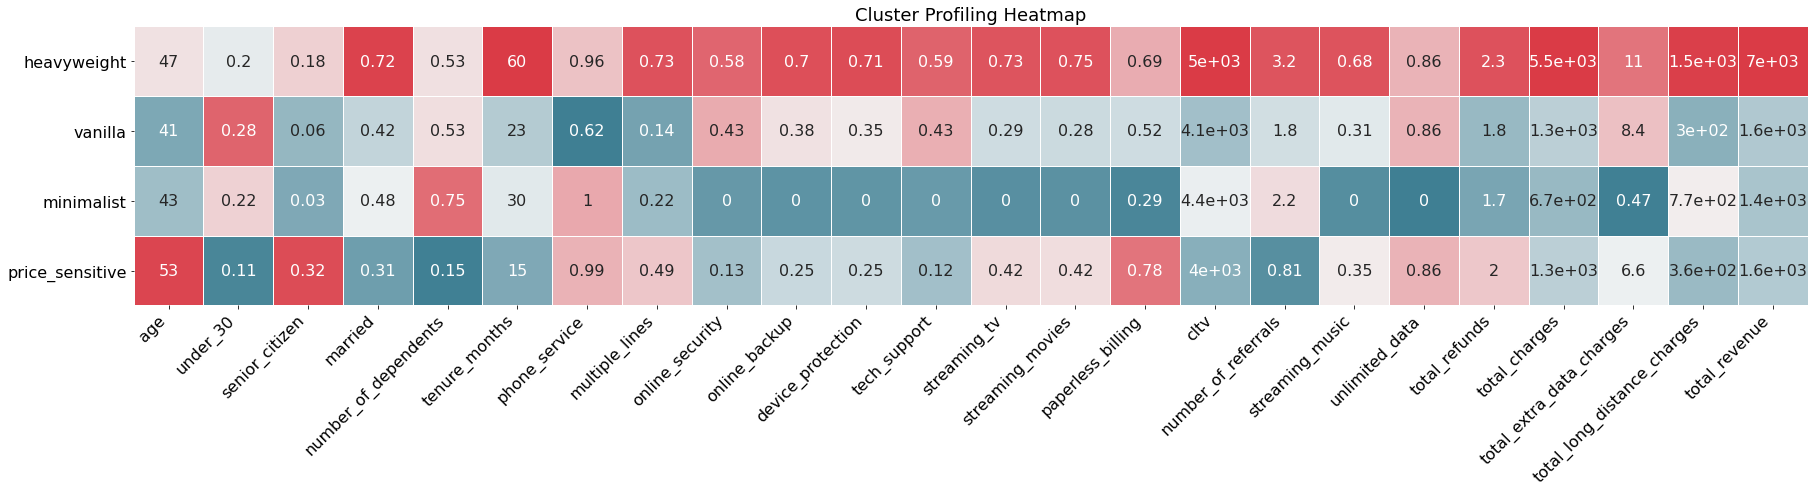

In [20]:
summary_clus = telco_final.groupby('cluster')[clus_col].mean()
summary_clus = summary_clus.rename(index={0:'heavyweight',1:'vanilla',2:'minimalist',3:'price_sensitive'})

plt.figure(figsize=(30, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#standardized colour scale
temp_ss = StandardScaler()
for_heatmap = pd.DataFrame(temp_ss.fit_transform(summary_clus), index=summary_clus.index, 
                           columns=summary_clus.columns)
sns.heatmap(for_heatmap, square=True, cmap=cmap, linewidths=.5, cbar=False, robust=True, 
            annot=round(summary_clus, 2), annot_kws={"fontsize":16})
plt.xticks(rotation=45, horizontalalignment='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.ylabel('')
plt.title("Cluster Profiling Heatmap", fontsize=18)
plt.savefig('../images/cluster_profile.png')
plt.show()

*Interpretation: Based on the features in the profiling, the below is the cluster interpretation*

1. **Heavyweight** -  Mostly married users with multiple lines / sub lines and high usage of services and subcription. This user are likely breadwinners with sublines and services attached to user's single account. The users are high revenue with high CLTV profiles. Such users are loyalist as well with long tenure months. 

2. **Vanilla** - Basic users made up of mostly under 30s to 40s. Tech savvy consumers with high data consumption and keen on online security. Second lowest CLTV profiles. 

3. **Minimalist** - Low commitment users with no strings attached. Users comprise of age between 30s to 60s. Users only require the basic necessity of mobile for phone services leading to additional long distance charges along in this profile. Minimalist are users with the lowest revenue profile yet the easiest to satisfy.  

4. **Price-sensitive** - Users that are mostly senior citizen. These are users with lowest CLTV profile. Users are keen on the subscription or services provided yet is not convinced for the full subscriptions. These users are with the shortest tenure months, indicating a easiest to churn profile. These users had similar charges to Vanilla,  yet has a shorter tenure are signs of price-loyalist. These types of users often seeks for better offer and will switch when convenient.


### 3.3.1 Validation Clusters

From above preliminary clustering, the below verification columns are plotted to the class to verify the premises. 

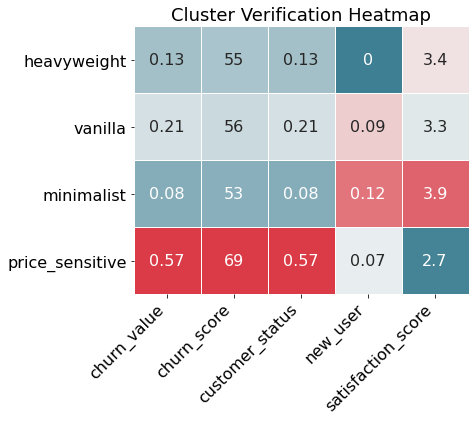

In [21]:
summary = telco_final.groupby('cluster').mean()[ver_col]
summary = summary.rename(index={0:'heavyweight',1:'vanilla',2:'minimalist',3:'price_sensitive'})

plt.figure(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
temp_ss = StandardScaler()
for_heatmap = pd.DataFrame(temp_ss.fit_transform(summary), index=summary.index, 
                           columns=summary.columns)
sns.heatmap(for_heatmap, square=True, cmap=cmap, linewidths=.5, cbar=False, robust=True, 
            annot=round(summary, 2), annot_kws={"fontsize":16})

plt.xticks(rotation=45, horizontalalignment='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.ylabel('')
plt.title("Cluster Verification Heatmap", fontsize=18)
plt.savefig('../images/cluster_verification.png')
plt.show()

*Interpretation:*

1. **Heavyweight** users does not have new users as loyal customers take time to build. Also the churn value and churn score are mid-tiered, similar to **Vanilla** users. 

2. **Minimalist** users are the lowest churn rate as the requirement for basic needs are well fulfilled, they have the higher satisfaction score, unlike **Price-sensitive** users that has the highest churn scores and churn rate. 

## 3.4 EDA By Clusters

After finalizing the cluster, we dive into the EDA by clusters to gain insights on the clustering groupings and correlation leading to the deductions. 

In [39]:
#replace numerical cluster to profiling
telco_final.cluster = telco_final.cluster.replace({0:'heavyweight',1:'vanilla',2:'minimalist',3:'price_sensitive'})
telco_final.cluster.value_counts(normalize=True)

price_sensitive    0.294051
heavyweight        0.270339
minimalist         0.218515
vanilla            0.217095
Name: cluster, dtype: float64

From the clustering, we can observed a balance distribution on all 4 customer segmentation, with minimalist and vanilla users with similar percentage. The higher percentage for price-sensitive consumers higher weights, due to these observations are closely linked within the clusters. 

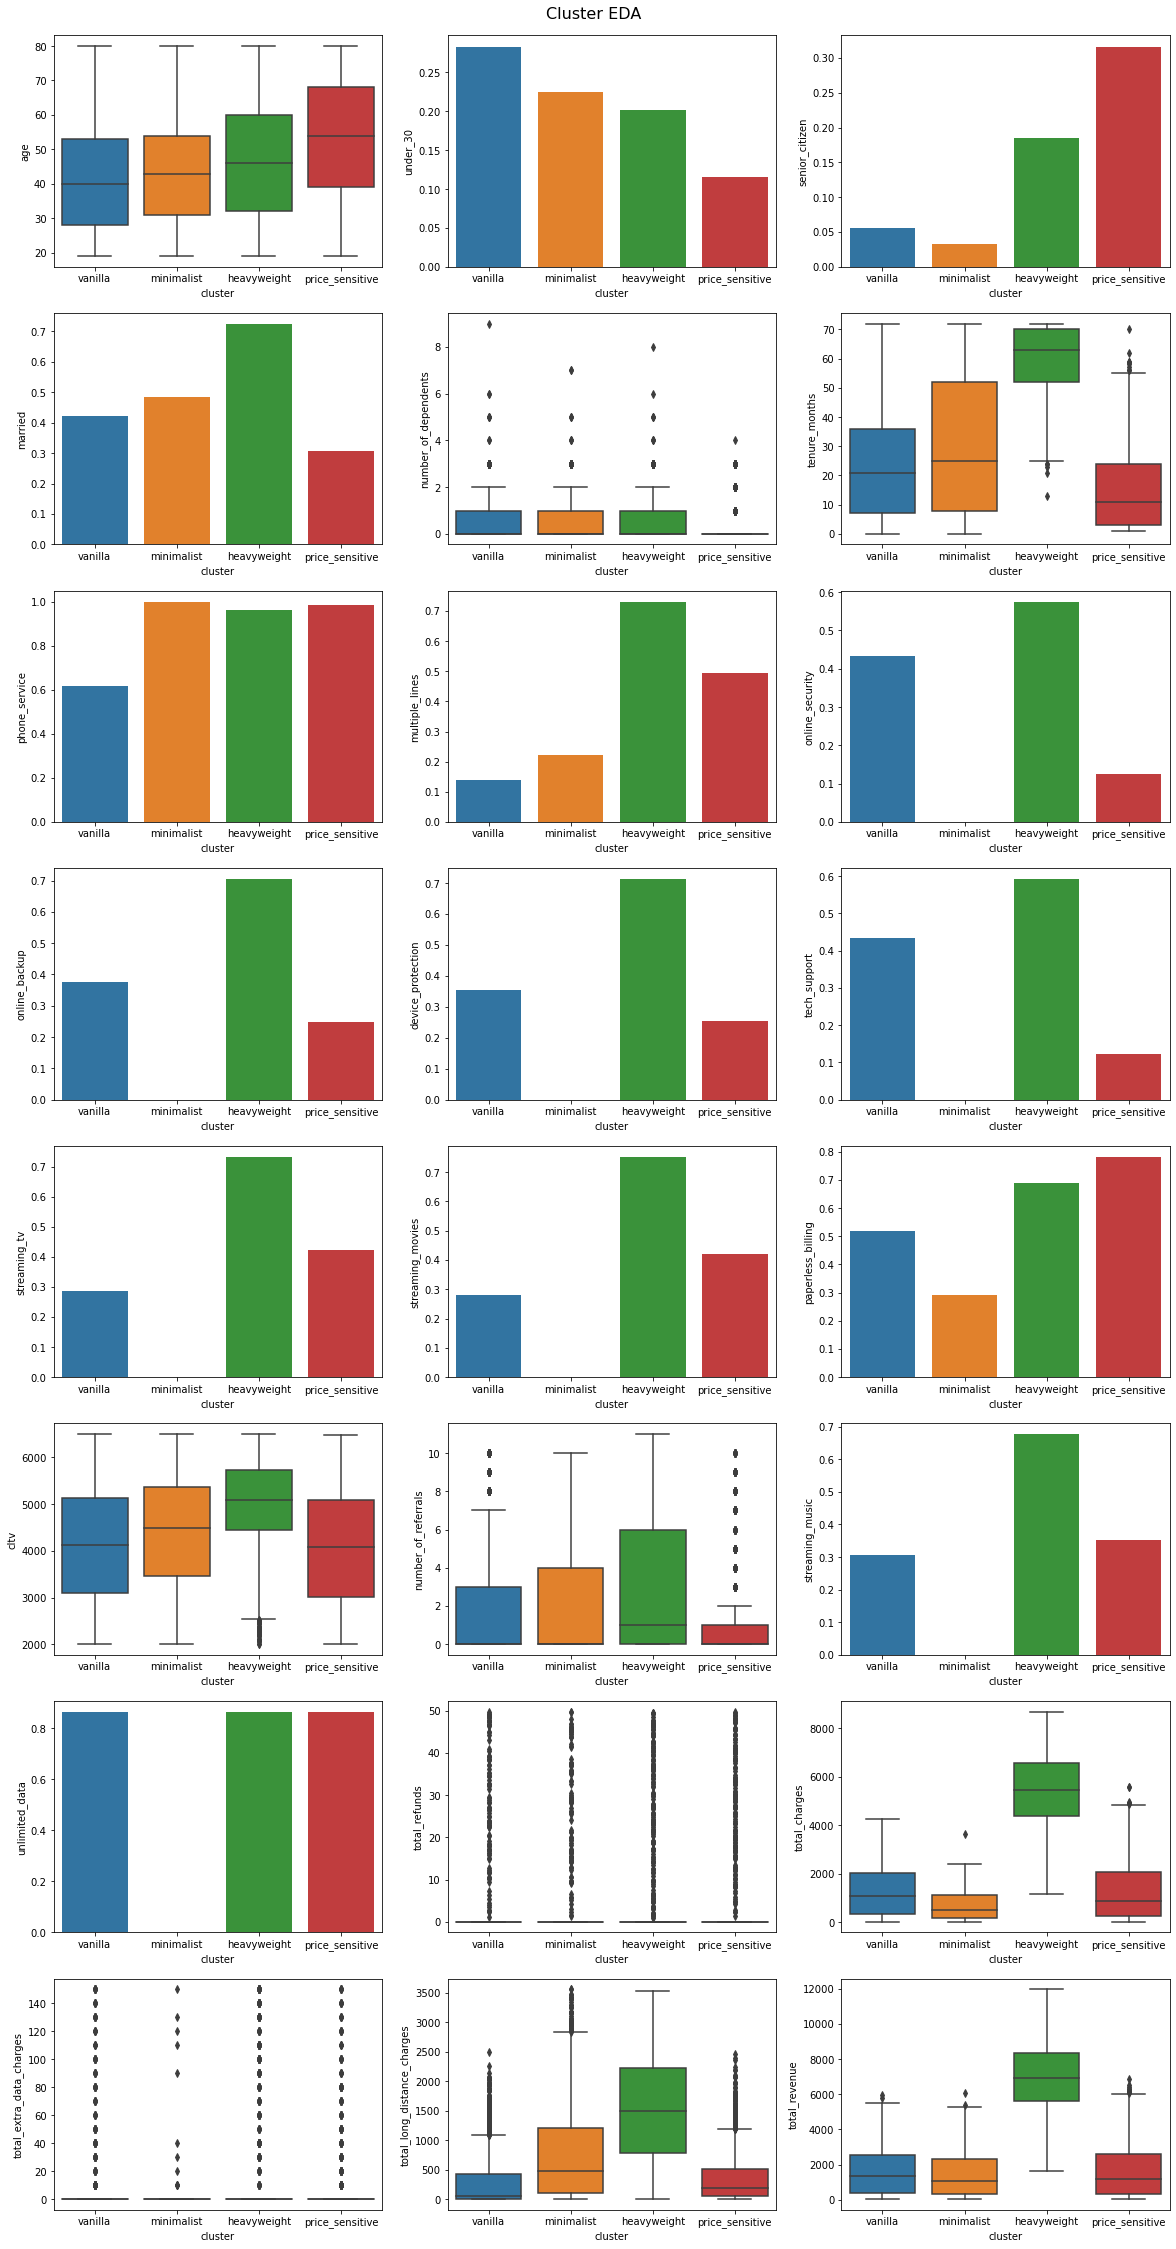

In [38]:
#create df for cluster features
sum_clus_num = summary_clus.select_dtypes(exclude='object').columns

#plot visualisation
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(20,40))
ax = ax.flatten()

for idx, col in enumerate(sum_clus_num):
    if telco_final[col].nunique() <= 4:
        sns.barplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx], ci=None, order=['vanilla','minimalist','heavyweight','price_sensitive'])
    else:
        sns.boxplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx], order=['vanilla','minimalist','heavyweight','price_sensitive'])

plt.suptitle(t='Cluster EDA',x=0.5, y = .89, fontsize=16);
plt.savefig('../images/cluster_eda.png')
plt.show()

*Interpretation: The below are additional findings on the clustering.*

1. `tenure_months` for heavyweight is higher min 50 months and price sensitive tenure is less than 25 months.

2. Highest `number_of_referral` and `cltv` for heavyweight users. 

3. Minimalist maintains the lowest paying users as they will opt for `paperless_billings` as with most offer for paper less billing discounts. 

4. `total_revenue` above 6000 are coming from heavyweight users. 

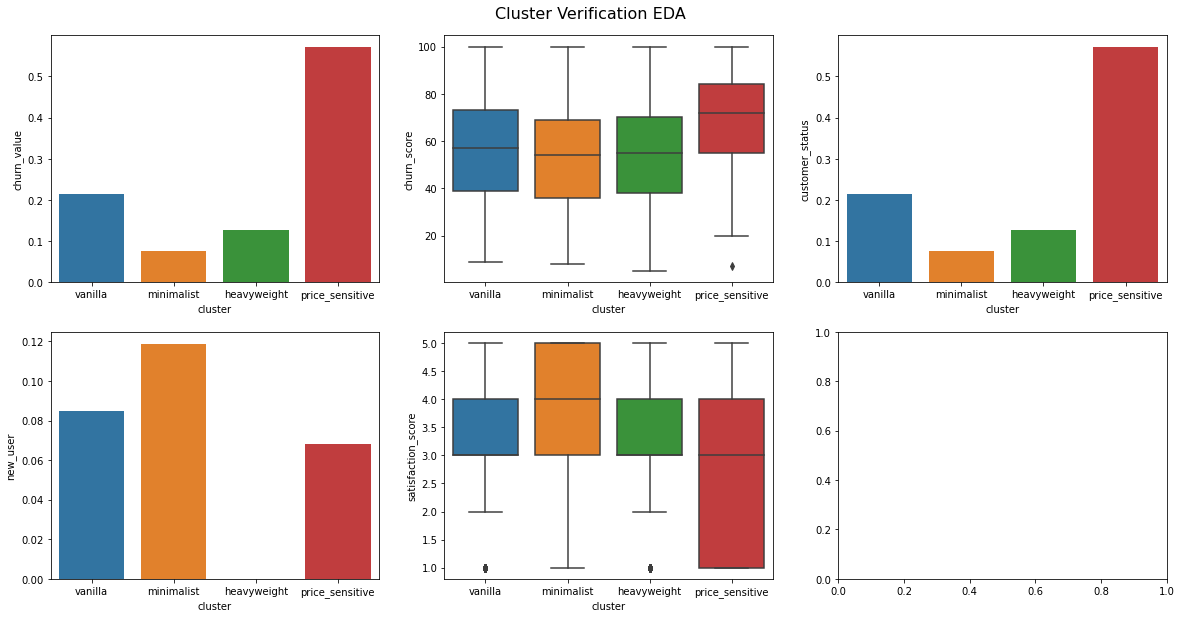

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax = ax.flatten()

for idx, col in enumerate(summary.columns):
    if telco_final[col].nunique() <= 4:
        sns.barplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx], ci=None,order=['vanilla','minimalist','heavyweight','price_sensitive'])
    else:
        sns.boxplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx], order=['vanilla','minimalist','heavyweight','price_sensitive'])

plt.suptitle(t='Cluster Verification EDA',x=0.5, y = .92, fontsize=16);
# plt.savefig('../images/cluster_verify.png')
plt.show()

*Interpretation:*

1. Price-sensitive users are the only cluster with `satisfaction_score` lower than 3.0. 

2. `new_user` can also be clustered in three types, vanilla, minimalist and price-sensitive. 

## 3.5 Customer Quadrant

As all customer segmentation on customer attrition, it is also essential to be able to identify the next course of action upon identification. Based on the churn score (churn risk) and the CLTV score, we utilize the quadrant as a tell tale on the customer value in return of investment. 

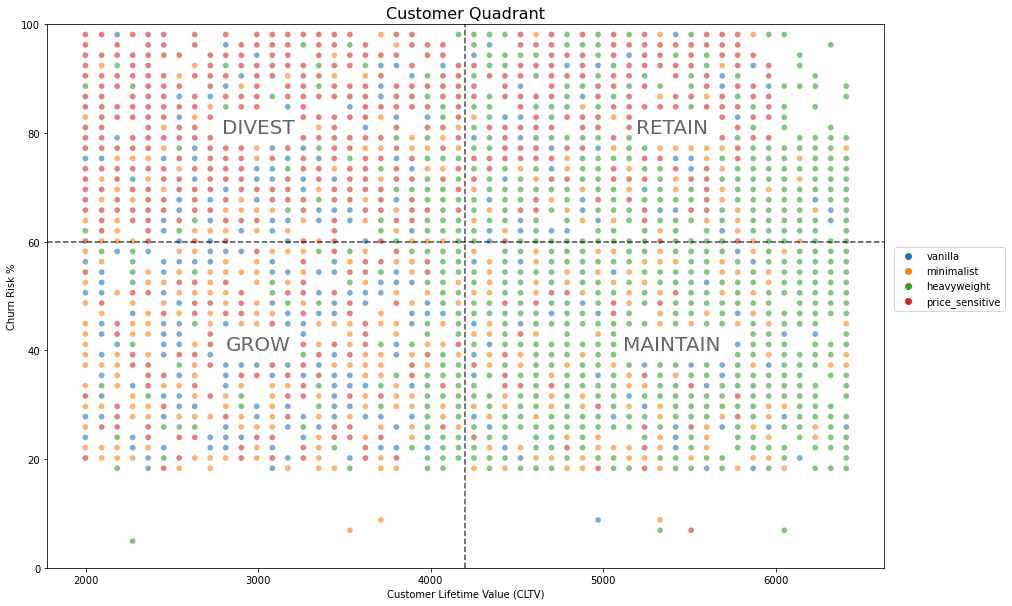

In [85]:
telco_quadrant = telco_final[['cltv','churn_score','cluster','satisfaction_score']].copy()
#group scatterplot to combine with mode as selection
telco_quadrant['cs_bin'] = pd.cut(telco_quadrant['churn_score'], bins=50).apply(lambda x: x.left)
telco_quadrant['cltv_bin'] = pd.cut(telco_quadrant['cltv'], bins=50).apply(lambda x: x.left)
plot_df = telco_quadrant.groupby(['cs_bin', 'cltv_bin']).agg({'cluster': lambda x: x.mode()[0]}).reset_index()

#plot quadrant
plt.figure(figsize=(15,10))
sns.scatterplot(data=plot_df, x='cltv_bin',y='cs_bin', hue='cluster', alpha=0.6, hue_order=['vanilla','minimalist','heavyweight','price_sensitive'])
plt.ylabel('Churn Risk %')
plt.xlabel('Customer Lifetime Value (CLTV)')
plt.title('Customer Quadrant', fontsize=16)
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(0.85, 0.4, 0.3, 0.2))

#quadrant division line
plt.axhline(y=60, c='k', alpha=0.7, linestyle='--') #median 20 - 100
plt.axvline(x=4200, c='k', alpha=0.7, linestyle='--') #median 2000 - 7000

#quadrant call for action
plt.text(5400,80,'RETAIN', fontsize=20, backgroundcolor='w', alpha=0.6, ha='center')
plt.text(5400,40,'MAINTAIN', fontsize=20, backgroundcolor='w', alpha=0.6, ha='center')
plt.text(3000,80,'DIVEST', fontsize=20, backgroundcolor='w', alpha=0.6, ha='center')
plt.text(3000,40,'GROW', fontsize=20, backgroundcolor='w', alpha=0.6, ha='center')

plt.show()

*Interpretation: The call for action to the customer that falls in either of the quadrant would be identified based on the churn score / churn risk against the customer lifetime value.*

RETAIN: Customer within this quadrant is of high value and high risk of churning. This is an alert indication for bsuiness to take action and communicate with the customers within this quadrant for retention promotion. From this dataset, we also see a prominent group of **heavyweight** users falling in this category alongside some **price-sensitive** users. 

DIVEST: Customers in this quadrant are high risk but low CLTV users. In this range, even though the customers have high chances of churning, as business, we would be conservative in spending or doubling and promotion for users who have low revenue to the business. This is a cautionary as business, we would like to avoid nurturing negative customer behaviour where they wait for promotion, leading to more losses. Most cluster within this quadrant are **price-sensitive** users.

GROW: Customer in this quadrant is new users that have low churn risk but also in a low CLTV. For this group, the call for action would be to grow and promote user loyalty and additional subscription to increase the revenue and customer lifetime value through retention as well. Majority cluster within this quadrant is **minimalist** and **vanilla** users.

MAINTAIN: Customer within this quadrant are users with low churn risk but high CLTV. These group of quadrant are posing high revenue and high satisfaction towards the business. These group are to be maintained where occasional attention will suffice to ensure the satisfaction is maintained for a long term relationship. Majority cluster in the quadrant is **heavyweight** users. 

## 3.6 Clustered Dataset Exported

In [86]:
telco_final.to_csv('../data/telco_clustered.csv', index=False)

Next, we will used the clustered information for the prediction modeling for churn in notebook 4.0. 